<a href="https://colab.research.google.com/github/dinann1990/Zenius/blob/main/Assessment_2_Perdinan_Daud_Panggabean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSESSMENT 2**
## [Data Source](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt)

## **Import Library**
---
> Mengimport library yang nantinya diperlukan dalam menjalankan sebuah syntax, library ada banyak macamnya, namun dalam Assessment 2, saya menggunakan ; Pandas, Numpy, Matplotlib.Pyplot, Seaborn, Plotly.Express, Plotly.Figure_Factory,Scipy, dan stasmodels.api yang diinisialkan untuk menjalankan syntax nantinya.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import requests
import statsmodels.api as sm

## **Import Dataset**
---
> Mengimport data melalui link url ke bentuk .csv(excel) untuk dibaca, memberi nama terhadap data per kolom nya, dan mengetahui apakah datatype dari dataset bertipe ; text, numeric, sequences atau set.


In [ ]:
# import dataset,dengan skip 41 baris untuk melewati data tipe text
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'
df_co2 = pd.read_csv(url, delim_whitespace=True, skiprows=41)

# memberi nama per kolomnya
df_co2 = pd.DataFrame({'year' : df_co2.iloc[:,-8],
                       'month' : df_co2.iloc[:,-7],
                       'date' : df_co2.iloc[:,-6],
                       'level of CO2' : df_co2.iloc[:,-5],
                       'seasonalized' : df_co2.iloc[:,-4],
                       'days' : df_co2.iloc[:,-3],
                       'std of days' : df_co2.iloc[:,-2],
                       'uncertainty of mon. mean' : df_co2.iloc[:,-1]
                       })
df_co2

,year,month,date,level of CO2,seasonalized,days,std of days,uncertainty of mon. mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
782,2023,5,2023.3750,424.00,420.56,31,0.69,0.24
783,2023,6,2023.4583,423.68,421.22,29,0.57,0.20
784,2023,7,2023.5417,421.83,421.42,21,0.48,0.20
785,2023,8,2023.6250,419.68,421.55,21,0.45,0.19


In [ ]:
#checking data types
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      787 non-null    int64  
 1   month                     787 non-null    int64  
 2   date                      787 non-null    float64
 3   level of CO2              787 non-null    float64
 4   seasonalized              787 non-null    float64
 5   days                      787 non-null    int64  
 6   std of days               787 non-null    float64
 7   uncertainty of mon. mean  787 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 49.3 KB


In [ ]:
#count numerical and categorical data
num_cols = df_co2._get_numeric_data().columns
cat_cols = list(set(df_co2.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['year', 'month', 'date', 'level of CO2', 'seasonalized', 'days',
       'std of days', 'uncertainty of mon. mean'],
      dtype='object')
Categorical columns:  []


## **Filtering Data & Cleaning Data**
---
Filtering unused variable and cleaning data

> Data yang sudah di filter kemudian perlu dilihat `#missingvalue`(kekosongan) nya untuk *data cleaning*, di dapat melalui syntax bahwa dataset 1958-2023 tidak memiliki `#missingvalue`(kekosongan). `#Missingvalue`(kekosongan) biasanya akan menjadi kejanggalan dalam interpretasi visual, maka dari itu perlu dilakukan *data cleaning* untuk bisa diolah ke interpretasi visual (*Data Visualization*).

  Namun dikarenakan tidak ada data bernilai NaNN/Null (missing value) maka data cleaning dilakukan dengan membuang data column yang tidak digunakan dalam pengolahan data


##### Check Missing Value

In [ ]:
#missing data value
df_co2.isnull().any()

year                        False
month                       False
date                        False
level of CO2                False
seasonalized                False
days                        False
std of days                 False
uncertainty of mon. mean    False
dtype: bool

In [ ]:
#banyaknya missing value dari dataset
df_co2.isna().sum()

year                        0
month                       0
date                        0
level of CO2                0
seasonalized                0
days                        0
std of days                 0
uncertainty of mon. mean    0
dtype: int64

##### Filter & Data Cleaning


In [ ]:
#membuang variabel yang tidak digunakan dalam analisis
drop = ['date', 'days', 'std of days', 'uncertainty of mon. mean']
df_co2_lim = df_co2.drop(columns=drop)
df_co2_lim

,year,month,level of CO2,seasonalized
0,1958,3,315.70,314.43
1,1958,4,317.45,315.16
2,1958,5,317.51,314.71
3,1958,6,317.24,315.14
4,1958,7,315.86,315.18
...,...,...,...,...
782,2023,5,424.00,420.56
783,2023,6,423.68,421.22
784,2023,7,421.83,421.42
785,2023,8,419.68,421.55


In [ ]:
#membuang variabel yang tidak digunakan dalam analisis
drop = ['date', 'days', 'std of days']
df_co2_lim2 = df_co2.drop(columns=drop)
df_co2_lim2

,year,month,level of CO2,seasonalized,uncertainty of mon. mean
0,1958,3,315.70,314.43,-0.99
1,1958,4,317.45,315.16,-0.99
2,1958,5,317.51,314.71,-0.99
3,1958,6,317.24,315.14,-0.99
4,1958,7,315.86,315.18,-0.99
...,...,...,...,...,...
782,2023,5,424.00,420.56,0.24
783,2023,6,423.68,421.22,0.20
784,2023,7,421.83,421.42,0.20
785,2023,8,419.68,421.55,0.19


## **Data Statistics Describtives**
---
> Mencari dan menunjukkan statistic describitves pada data mentah untuk menyesuaikan data dan mempermudah dalam pengolahan data nantinya



In [ ]:
# statistik deskriptif
summary_stats = df_co2_lim.describe()
summary_stats

,year,month,level of CO2,seasonalized
count,787.000000,787.000000,787.000000,787.000000
mean,1990.458704,6.495553,358.467510,358.459479
std,18.946403,3.444348,31.175522,31.110256
min,1958.000000,1.000000,312.430000,314.430000
25%,1974.000000,4.000000,330.115000,330.470000
50%,1990.000000,6.000000,354.420000,355.110000
75%,2007.000000,9.000000,383.765000,383.755000
max,2023.000000,12.000000,424.000000,422.020000


## **Part 1: Descriptive Statistics - Masic Measures**
---
> Compute the mean, median, and standard deviation for CO2 Levels.




##### Mean

> Mencari Mean untuk data dari setiap variabel dalam datasets dan juga Mean untuk setiap tahunnya dengan kadar CO2 dimana ditunjukkan bahwa rata-rata kadar CO2 setiap tahunnya meningkat.



In [ ]:
#mencari total mean per variabel pada data
mean_co2 = df_co2_lim.mean()
mean_co2

year            1990.458704
month              6.495553
level of CO2     358.467510
seasonalized     358.459479
dtype: float64

In [ ]:
#mean per year to level of CO2 based on data
year_avg = df_co2_lim.groupby('year')['level of CO2'].mean()
year_avg = year_avg.reset_index()
year_avg

,year,level of CO2
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


In [ ]:
#mean per month to level of CO2 based on data
month_avg = df_co2_lim.groupby('month')['level of CO2'].mean()
month_avg = month_avg.reset_index()
month_avg

,month,level of CO2
0,1,358.591231
1,2,359.365692
2,3,359.532727
3,4,360.833333
4,5,361.413485
5,6,360.852576
6,7,359.318182
7,8,357.307273
8,9,355.763636
9,10,354.847231


##### Median

> Mencari Median untuk data dari setiap variabel dalam datasets dan juga Median untuk setiap tahunnya dengan kadar CO2



In [ ]:
#mencari total median per variabel pada data
median_co2 = df_co2_lim.median()
median_co2

year            1990.00
month              6.00
level of CO2     354.42
seasonalized     355.11
dtype: float64

In [ ]:
#median per year to level of CO2 based on data
year_med = df_co2_lim.groupby('year')['level of CO2'].median()
year_med = year_med.reset_index()
year_med

,year,level of CO2
0,1958,315.315
1,1959,316.030
2,1960,316.705
3,1961,317.355
4,1962,318.245
...,...,...
61,2019,411.960
62,2020,414.275
63,2021,416.695
64,2022,418.805


In [ ]:
#median per month to level of CO2 based on data
month_med = df_co2_lim.groupby('month')['level of CO2'].median()
month_med = month_med.reset_index()
month_med

,month,level of CO2
0,1,354.930
1,2,355.820
2,3,356.540
3,4,357.575
4,5,358.305
5,6,357.310
6,7,355.595
7,8,353.515
8,9,351.860
9,10,351.690


##### Standart Deviation

> Mencari Standar Deviasi untuk data dari setiap variabel dalam datasets dan juga Standar Deviasi untuk setiap tahunnya dengan kadar CO2


In [ ]:
#mencari standar deviasi per variabel pada data
std_dev_co2 = df_co2_lim.std()
std_dev_co2

year            18.946403
month            3.444348
level of CO2    31.175522
seasonalized    31.110256
dtype: float64

In [ ]:
#standart deviation per year to level of CO2 based on data
year_std = df_co2_lim.groupby('year')['level of CO2'].std()
year_std = year_std.reset_index()
year_std

,year,level of CO2
0,1958,1.848698
1,1959,1.617194
2,1960,2.043869
3,1961,1.777365
4,1962,1.851783
...,...,...
61,2019,1.942096
62,2020,1.881119
63,2021,2.026840
64,2022,1.737939


In [ ]:
#standart deviation per month to level of CO2 based on data
month_std = df_co2_lim.groupby('month')['level of CO2'].std()
month_std = month_std.reset_index()
month_std

,month,level of CO2
0,1,31.232796
1,2,31.274629
2,3,31.472134
3,4,31.589839
4,5,31.637430
5,6,31.588995
6,7,31.387039
7,8,31.333651
8,9,31.435785
9,10,30.840129


##### Dataframe Statistic

> Membuat dataframe statistik untuk data Mean, Median, dan Standar Deviasi dari tiap variabel yang sudah dicari untuk mempermudah dalam interpretasi visualnya.



In [ ]:
# create dataframe memuat statistik deskriptif dari dataset part 1
stats_desc = pd.DataFrame({'variable' : ['year', 'month', 'level of CO2', 'seasonalized', 'uncertainty of mon. mean'],
                          'mean' : [1990.458704, 6.495553, 358.467510, 358.459479, -0.100521],
                          'median' : [1990.00,  6.00, 354.42, 355.11, 0.15],
                          'standar deviation' : [18.946403, 3.444348, 31.175522, 31.110256, 0.513548]})
stats_desc

,variable,mean,median,standar deviation
0,year,1990.458704,1990.00,18.946403
1,month,6.495553,6.00,3.444348
2,level of CO2,358.467510,354.42,31.175522
3,seasonalized,358.459479,355.11,31.110256
4,uncertainty of mon. mean,-0.100521,0.15,0.513548


## **Part 2: Exploratory Data Analysis with Python I - Univariate Analysis**
---
> Visualize the distribution of CO2 Levels through plots like histograms or density plots.



###  **Histogram**
---

> Visualisasi grafik histogram plot menunjukkan persebaran "level of CO2" berdasarkan frekuensinya. Dilihat bahwa sebaran CO2 sebesar 320ppm memiliki kemunculan/frekunsi tertinggi berdasarkan datasets.


>Berdasarkan visualisasi grafik histogram plot juga menunjukkan bahwa sebaran data condong ke sebelah kanan atau ke nilai yang lebih rendah (positive skewness). Oleh karena itu, dapat disimpulkan bahwa data variabel CO2_Levels memiliki nilai mean lebih besar daripada nilai modus.





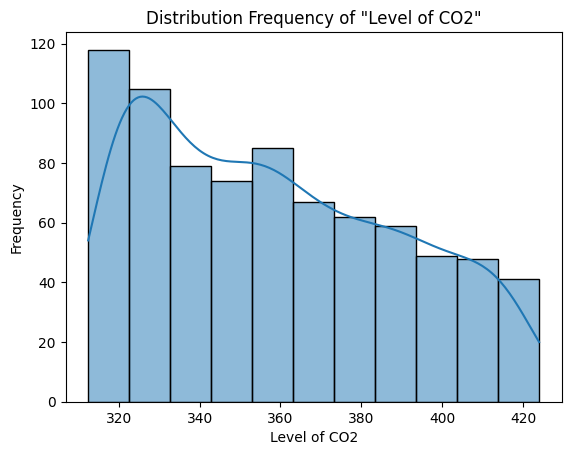

In [ ]:
# create histogram distribution frequency of level of CO2
sns.histplot(data=df_co2_lim, x='level of CO2', kde=True)
plt.xlabel('Level of CO2')
plt.ylabel('Frequency')

plt.title('Distribution Frequency of "Level of CO2"')
plt.show()

### **Density Plot**
---
> Berdasarkan visualisasi grafik density plot dan distplot, terlihat bahwa sebaran data cenderung ke arah yang lebih rendah atau sebelah kanan (skewness positif). Hal ini didukung oleh nilai skewness yang lebih besar dari 0, yang menunjukkan bahwa distribusi data memiliki kemiringan positif. Oleh karena itu, kesimpulan yang dapat diambil adalah bahwa nilai rata-rata dari variabel CO2_Levels lebih besar daripada nilai modus, dan distribusi data tersebut cukup mendekati distribusi normal karena nilai skewness berada dalam rentang antara -2 hingga 2.




In [ ]:
sns.set()

In [ ]:
print(sp.stats.skew(df_co2_lim['level of CO2'], axis=0, bias=True))

0.36300326281049144


<ipython-input-24-f80f1042bd6a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_co2_lim['level of CO2'], shade=True)


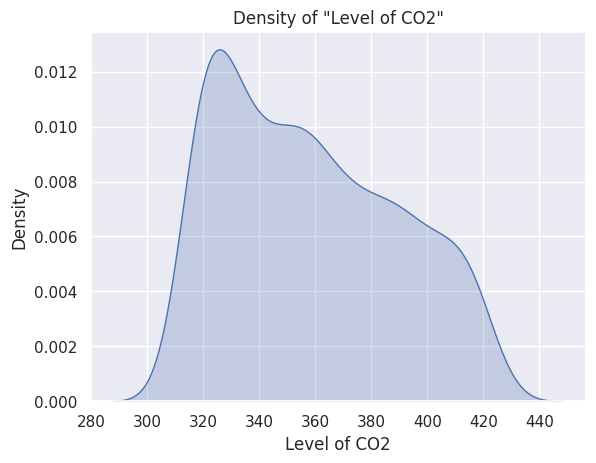

In [ ]:
# create density plot of level of CO2 with kdeplot
sns.kdeplot(df_co2_lim['level of CO2'], shade=True)
plt.xlabel('Level of CO2')
plt.ylabel('Density')

plt.title('Density of "Level of CO2"')
plt.show()

<ipython-input-25-7f00b85e081c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2['level of CO2'], hist=True, kde=True,


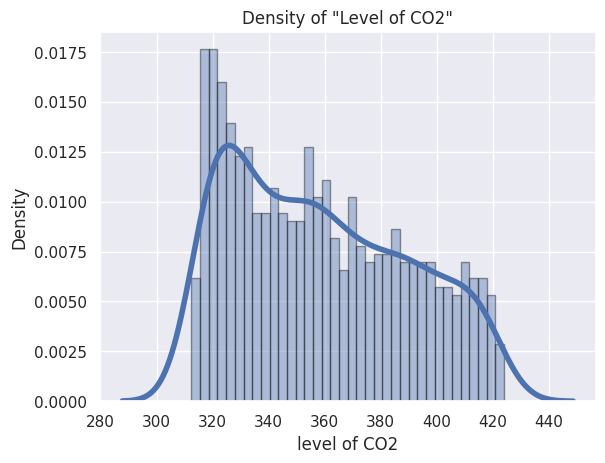

In [ ]:
#create density plot of level of CO2 using distplot
sns.distplot(df_co2['level of CO2'], hist=True, kde=True,
             bins=int(180/5),
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

plt.title('Density of "Level of CO2"')
plt.show()

## **Part 3: Exploratory Data Analysis with Python II - Bivariate Analysis**
---
> Investigate the relationship between Year and CO2 Levels using scatterplots, line plots, or correlation matrices.



#### **Scatterplot**
---

##### Scatterplot Year to Level of CO2

> Dari visualisasi scatterplot ditunjukkan bahwa persebaran kadar CO2 tiap tahunnya meningkat dan berbanding lurus, dimana semakin tahun maju, semakin naik juga kadar CO2 nya per ppm. Sehingga, dapat disimpulkan bahwa hubungannya positif (Positive Correlation).

> Dari visualisasi grafik ke-2 yang diambil dari rata-rata kadar CO2 dengan rata-rata tiap tahun nya juga menunjukkan bahwa sebaran rata-rata kadar CO2 per tahun nya semakin meningkat.





In [ ]:
# create scatterplot using plotly express for year to level of CO2
px.scatter(df_co2_lim,x = 'year',y = 'level of CO2',color = 'level of CO2', title='Correlation between year and level of CO2')

In [ ]:
# create scatterplot using plotly express for average per year to average level of CO2 each year
px.scatter(year_avg,x = 'year',y = 'level of CO2',color = 'level of CO2', title='Correlation between year and level of CO2')

##### Scatterplot Month to Level of CO2

> Berdasarkan hasil visualiasi grafik scatterplot terlihat bahwa data dengan data numeric antar tiap bulan nya dengan kadar CO2 cenderung menunjukkan garis linear tiap bulan nya di tiap tahun. Oleh karena itu, dapat disarankan bahwa ada hubungan linier yang jelas antara variabel uji.

> Dari grafik ke-2 juga dapat diketahui bahwa rata-rata rata-rata CO2_Levels dari rata-rata tiap bulan, yang tertinggi terjadi pada bulan 5 atau bulan Mei dan rata-rata CO2_Levels terendah terjadi pada bulan 10 atau bulan Oktober.




In [ ]:
# create scatterplot using plotly express for month to level of CO2
px.scatter(df_co2_lim,x = 'month',y = 'level of CO2',color='year' ,title='Correlation between month and level of CO2')

In [ ]:
# create scatterplot using plotly express for average per month to average level of CO2 each year
px.scatter(month_avg,x = 'month',y = 'level of CO2',color='level of CO2' ,title='Correlation between month and level of CO2')

###**Line Plot**
---

#### Line Plot for Year to Level of CO2

> Dari hasil visualisasi grafik line plot dapat dilihat bahwa pada setiap kenaikan tahun, juga terjadi kenaikan pada kadar CO2

> Dari grafik ke-2 juga ditunjukkan bahwa rata-rata tiap tahun nya, menunjukkan bahwa sebaran kadar CO2 dengan rata-rata tiap tahun dan rata-rata kadar CO2 berbanding lurus, jika tahun meningkat kadar CO2 juga meningkat.




Text(0, 0.5, 'Level of CO2')

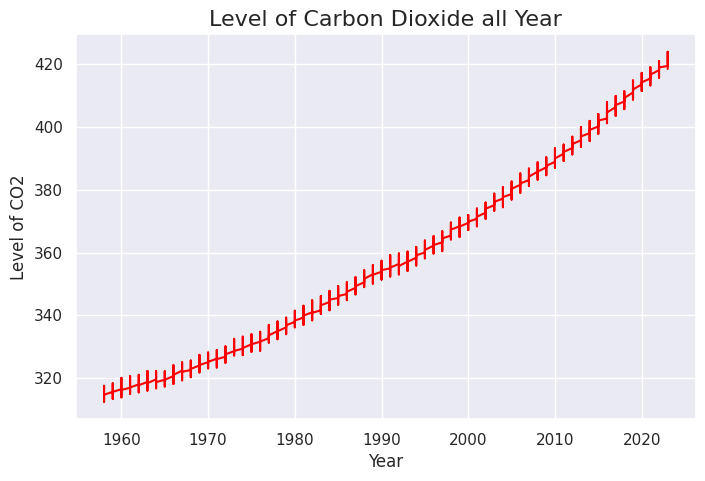

In [ ]:
# create line plot of Level Carbon Dioxide all year based on year
month_all = df_co2_lim['year']
level_all = df_co2_lim['level of CO2']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Carbon Dioxide all Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Level of CO2', fontsize = 12)

Text(0, 0.5, 'Level of CO2')

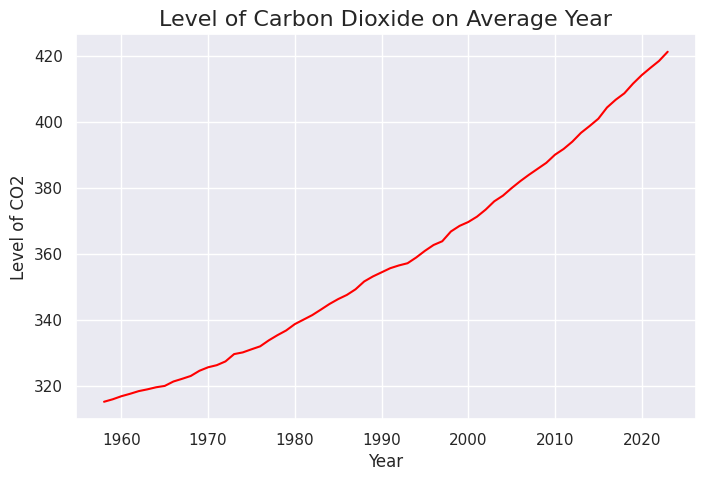

In [ ]:
# create line plot of Level Carbon Dioxide average year based on year
month_all = year_avg['year']
level_all = year_avg['level of CO2']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Carbon Dioxide on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Level of CO2', fontsize = 12)

#### Line Plot for Month to Level of CO2

> Dari hasil visualisasi grafik line plot didapat bahwa plotnya tidak membentuk hubungan, tetapi membentuk gelombang cosinus. Sehingga, dari grafik tersebut dapat disimpulkan bahwa rata-rata CO2_Levels tertinggi terjadi pada bulan 5 atau bulan Mei dan rata-rata CO2_Levels terendah terjadi pada bulan 10 atau bulan Oktober.

Text(0, 0.5, 'Level of CO2')

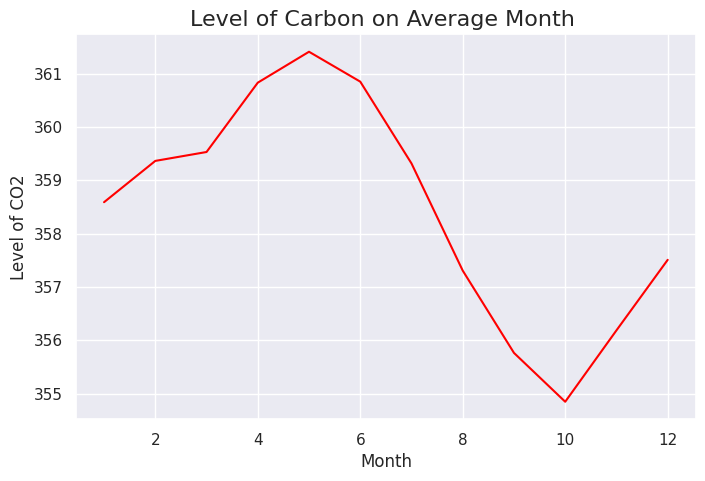

In [ ]:
# create line plot of Level Carbon Dioxide on Average Month
month_all = month_avg['month']
level_all = month_avg['level of CO2']
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Carbon on Average Month ', fontsize = 16)
# add label
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Level of CO2', fontsize = 12)

### **Correlation Matrices**
---
Berdasarkan hasil visualisasi grafik Correlation Matrices dapat disimpulkan bahwa:


> Variabel CO2_Levels memiliki hubungan yang kuat dan positif dengan variabel year, dengan korelasi sekitar 0.988707. Ini menunjukkan adanya hubungan yang erat antara tingkat CO2 dan tahunnya.

> Variabel CO2_Levels memiliki hubungan yang lemah dan negatif dengan variabel month, dengan korelasi sekitar -0.04360014. Ini menunjukkan bahwa tingkat CO2 cenderung memiliki fluktuasi yang kurang berkaitan dengan bulan-bulan dalam tahun.

> Variabel seasonalized memiliki hubungan yang kuat dan positif dengan variabel year, dengan korelasi sekitar 0.99034. Hal ini menunjukkan bahwa seasonalized juga memiliki hubungan yang erat dengan tahunnya.

> Variabel seasonalized memiliki hubungan yang sangat lemah dan hampir tidak ada hubungan dengan variabel month, dengan korelasi sekitar 0.0003096901. Ini menandakan bahwa seasonalized hampir tidak dipengaruhi oleh perubahan bulan-bulan dalam tahun.



In [ ]:
correlation_matrix = df_co2_lim.corr()

In [ ]:
df_co2_lim.corr()

,year,month,level of CO2,seasonalized
year,1.000000,-0.014893,0.988707,0.990340
month,-0.014893,1.000000,-0.043600,0.000310
level of CO2,0.988707,-0.043600,1.000000,0.997703
seasonalized,0.990340,0.000310,0.997703,1.000000


In [ ]:
px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='hot')

##**Part 4: Supervised Learning - Regression - Simple Linear Regression**
---

> Perform a simple linear regression using Year as the independent variable and CO2 Levels as the dependent variable.



##### Visualisasi Regresi dengan Semua Tahun dan Level of CO2

> Dari hasil visualisi Regresi ditunjukkan bahwa hasil visualisasi menunjukkan terdapat hubungan yang positif antara variabel year dan level of CO2 karena semakin besar nilai variabel year, maka nilai variabel level of CO2 juga semakin besar.



In [ ]:
regresi_total = df_co2_lim[['year','level of CO2']]
regresi_total

,year,level of CO2
0,1958,315.70
1,1958,317.45
2,1958,317.51
3,1958,317.24
4,1958,315.86
...,...,...
782,2023,424.00
783,2023,423.68
784,2023,421.83
785,2023,419.68


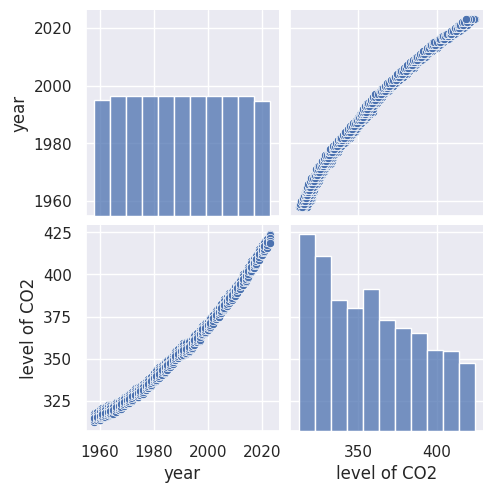

In [ ]:
sns.pairplot(regresi_total)

##### Visualisasi Model Regresi antara Rata-Rata per Tahun dengan Rata-Rata Kadar CO2 tiap tahunnya.

In [ ]:
year_avg

,year,level of CO2
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


In [ ]:
regresi_pertahun =year_avg.rename(columns={"year":"x","level of CO2":"y"})
regresi_pertahun

,x,y
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


In [ ]:
regresi_pertahun['(x-x_mean)'] = round(regresi_pertahun['x'] - regresi_pertahun['x'].mean(),2)
regresi_pertahun['(y-y_mean)'] = round(regresi_pertahun['y'] - regresi_pertahun['y'].mean(),2)
regresi_pertahun['(x-x_mean)(y-y_mean)'] = regresi_pertahun['(x-x_mean)'] * regresi_pertahun['(y-y_mean)']
regresi_pertahun['pow((x-x_mean),2)'] = round(pow(regresi_pertahun['x'] - regresi_pertahun['x'].mean(),2),2)
regresi_pertahun

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,1958,315.232000,-32.5,-43.36,1409.200,1056.25
1,1959,315.980833,-31.5,-42.62,1342.530,992.25
2,1960,316.910000,-30.5,-41.69,1271.545,930.25
3,1961,317.644167,-29.5,-40.95,1208.025,870.25
4,1962,318.454167,-28.5,-40.14,1143.990,812.25
...,...,...,...,...,...,...
61,2019,411.649167,28.5,53.05,1511.925,812.25
62,2020,414.210833,29.5,55.61,1640.495,870.25
63,2021,416.413333,30.5,57.82,1763.510,930.25
64,2022,418.528333,31.5,59.93,1887.795,992.25


In [ ]:
#Rumus menghitung slope (b1)
b1 = regresi_pertahun['(x-x_mean)(y-y_mean)'].sum() / regresi_pertahun['pow((x-x_mean),2)'].sum()
b1

1.6280872560275546

In [ ]:
#Menghitung rata-rata y dan x
regresi_pertahun['y'].mean(), regresi_pertahun['x'].mean()

(358.5963813131313, 1990.5)

In [ ]:
#Rumus menghitung intercept (b0)
b0 = regresi_pertahun['y'].mean() - b1 * regresi_pertahun['x'].mean()
b0

-2882.111301809716

In [ ]:
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

'y = -2882.111301809716 + 1.6280872560275546 * x'

In [ ]:
ols_model = sm.OLS(regresi_pertahun['y'],regresi_pertahun['x'])
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.074e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                    6.69e-74
Time:                        14:31:49   Log-Likelihood:                         -313.39
No. Observations:                  66   AIC:                                      628.8
Df Residuals:                      65   BIC:                                      631.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

######**Interpretasi Model Awal dan Model Mutlak Regresi Berdasarkan Uji F dan Uji T**
-----
**Interpretasi Model**
---
Dari hasil di atas, dapat disimpulkan bahwa model regresi yang cocok untuk data di atas adalah

y = -2882.111301809716 + 1.6280872560275546 * x.

Dengan keterangan :

y = level of CO2

x = year

𝛽0 = -2882.111301809716 memiliki arti bahwa apabila nilai tahun sebesar 0, maka besar CO2 Levels sebesar -2882.111301809716

𝛽1 = 1.6280872560275546 memiliki arti bahwa setiap peningkatan satu satuan variabel year
akan meningkatkan nilai CO2 Levels sebesar 1.6280872560275546

---
**Uji F**
---

-**Hipotesis**

H0 : 𝛽0 = 𝛽1 = 0 atau model tidak sesuai

H1 : 𝛽𝑖 ≠ 0 untuk paling sedikit satu i atau model regresi sesuai

-**Taraf Signifikansi**

α = 5% (0,05)

-**Statistik Uji**

Dari output di atas, diperloleh nilai probabilitas F sebesar 6.97e-74.

-**Daerah Kritis**

Tolak H0, jika P-Value < α

-**Keputusan**

𝐻0 ditolak karena nilai prob F (6.97e-74) < α (0,05).

-**Kesimpulan**

Pada taraf signifikansi α = 5%, 𝐻0 ditolak. Sehingga, dapat disimpulkan bahwa model cocok atau model regresi dapat digunakan untuk memprediksi Y.

---
**Uji T**
---

-**Hipotesis**

H0 ∶ 𝛽𝑗 = 0 atau koefisien parameter tidak sesuai

𝐻1 ∶ 𝛽𝑗 ≠ 0 atau koefisien parameter sesuairegresi sesuai

-Taraf Signifikansi

α = 5%

-**Statistik Uji**

Dari output di atas, diperloleh nilai probabilitas t sebesar 0.000.

-**Daerah Kritis**

Tolak H0, jika P-Value < α

-**Keputusan**

𝐻0 ditolak karena nilai prob t (0.000) < α (0,05).

-**Kesimpulan**

Pada taraf signifikansi α 5%, 𝐻0 ditolak. Sehingga, dapat disimpulkan bahwa koefisien parameter sesuai atau dengan kata lain variabel X berpengaruh terhadap Y.

---
**Koefisien Determinasi**


Berdasarkan nilai R-Square, dapat diartikan bahwa sehingga dapat diartikan sebesar 99.4% variabel Y dipengaruhi oleh variabel X, sedangkan sisanya sebesar 0.6% variabel Y dipengaruhi oleh faktor lain.

---
**Keputusan Akhir**


Berdasarkan uji F, model regresi yang dibuat cocok digunakan untuk analisis lebih
lanjut dan berdasarkan uji t, koefisien parameter regresi X yaitu 𝛽1 berpengaruh
signfikan terhadap Y. Sehingga model akhir sama dengan model awal, yaitu :

y = -2882.111301809716 + 1.6280872560275546 * x.

Dengan keterangan :

y = level of CO2

x = year



###### Visualisasi Regresi Data

> Dari hasil visualisasi grafik Regresi ditunjukkan bahwa hasil visualisasi menunjukkan terdapat hubungan yang positif antara variabel year dan CO2_Levels karena plot-plotnya berada diantara garis linier dan semakin besar nilai variabel year, maka nilai variabel CO2_Levels juga akan semakin besar.



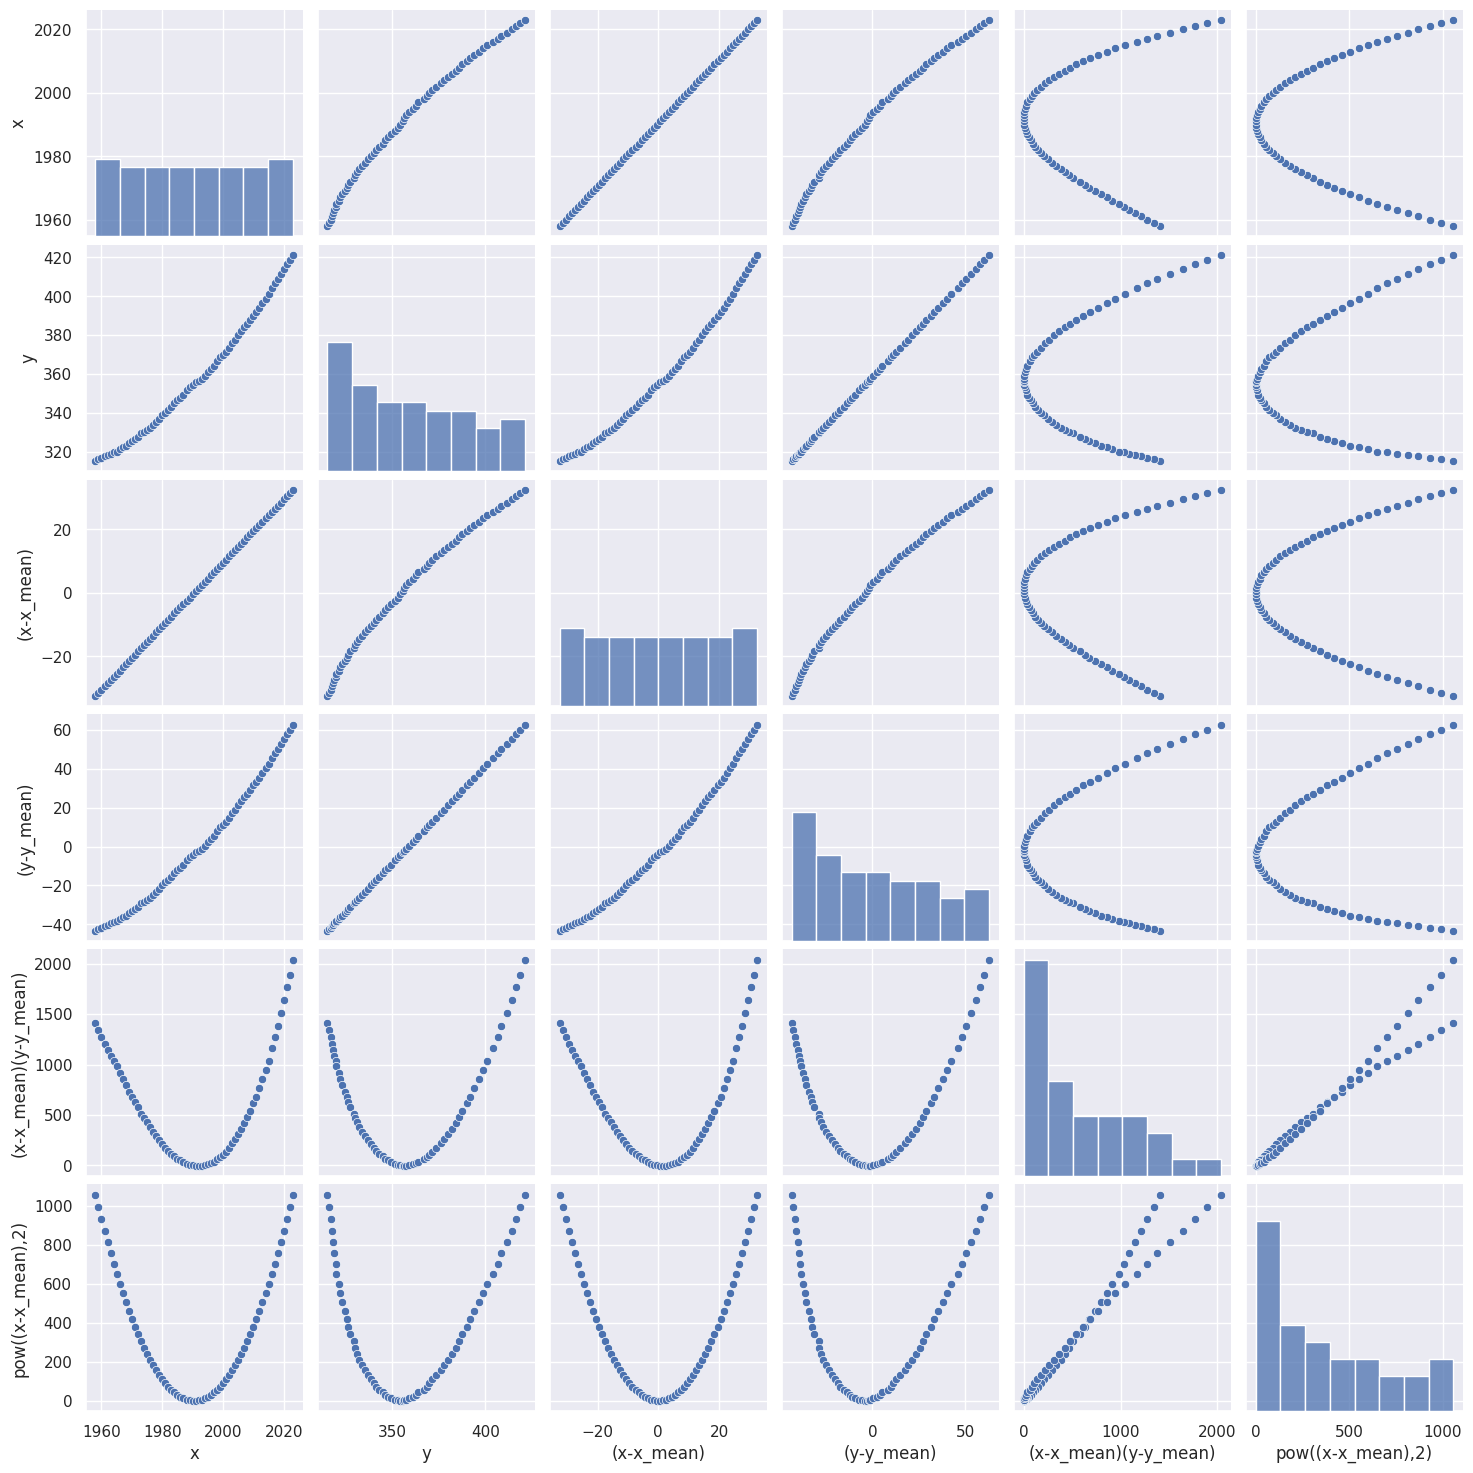

In [ ]:
sns.pairplot(regresi_pertahun)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
year = year_avg['year']
co2_levels = year_avg['level of CO2']
year = year.values.reshape(-1,1)

# create model regresi linear
model = LinearRegression()

# fitting model "year"
model.fit(year, co2_levels)

slope = model.coef_[0]
intercept = model.intercept_

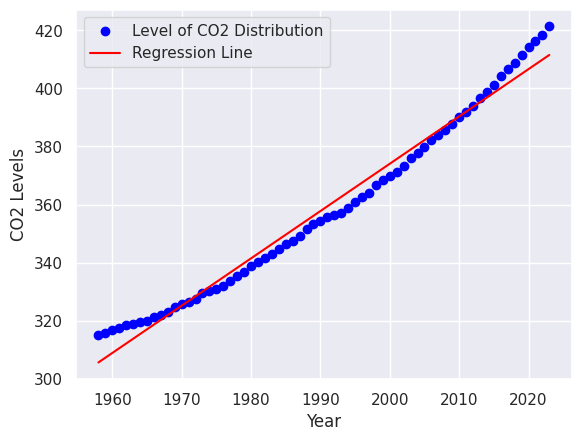

In [ ]:
# create plot for data points
plt.scatter(year, co2_levels, label='Level of CO2 Distribution', color='blue')

# create for the regression line
regression_line = slope * year + intercept
plt.plot(year, regression_line, label='Regression Line', color='red')

plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

## **Part 5: Unsupervised Learning - K-Means Clustering**
----

> If there are other climate-related variables in the dataset, use K-Means clustering to categorize years into different climate profiles.



> Berdasarkan hasil syntax dan output yang telah didapatkan, diketahui bahwa hasil clustering dibagi menjadi 2 dan melalui perhitungan dapat disimpulkan bahwa terdapat beberapa data pada cluster 0 dan cluster 1. Adapun data tahun tiap cluster, antara lain :

> Pada cluster 0, terdiri dari : 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2009, 2013.
Pada cluster 1, terdiri dari : 2007, 2008, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022.





In [ ]:
#import library untuk proses K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colors
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
df_co2_lim2

,year,month,level of CO2,seasonalized,uncertainty of mon. mean
0,1958,3,315.70,314.43,-0.99
1,1958,4,317.45,315.16,-0.99
2,1958,5,317.51,314.71,-0.99
3,1958,6,317.24,315.14,-0.99
4,1958,7,315.86,315.18,-0.99
...,...,...,...,...,...
782,2023,5,424.00,420.56,0.24
783,2023,6,423.68,421.22,0.20
784,2023,7,421.83,421.42,0.20
785,2023,8,419.68,421.55,0.19


In [ ]:
#memanggil tabel rata-rata level of CO2 per tahun nya
year_avg

,year,level of CO2
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


In [ ]:
# filter dataset mean CO2 per year dari tahun 1994 - 2022
year_avg_lim = year_avg[(year_avg.year >= 1994) & (year_avg.year <= 2022)]
year_avg_lim

,year,level of CO2
36,1994,358.959167
37,1995,360.968333
38,1996,362.743333
39,1997,363.876667
40,1998,366.840000
41,1999,368.540000
42,2000,369.707500
43,2001,371.319167
44,2002,373.452500
45,2003,375.983333


In [ ]:
#create dataframe mean of uncertainty of mon. mean per tahun nya
unc_avg = df_co2_lim2.groupby("year")['uncertainty of mon. mean'].mean().to_frame().reset_index()
unc_avg

,year,uncertainty of mon. mean
0,1958,-0.990000
1,1959,-0.990000
2,1960,-0.990000
3,1961,-0.990000
4,1962,-0.990000
...,...,...
61,2019,0.230833
62,2020,0.185000
63,2021,0.240000
64,2022,0.212500


In [ ]:
# filter dataset uncertainty of mon. mean CO2 dari tahun 1994 - 2022
unc_avg_lim = unc_avg[(unc_avg.year >= 1994) & (unc_avg.year <= 2022)]
unc_avg_lim

,year,uncertainty of mon. mean
36,1994,0.170000
37,1995,0.184167
38,1996,0.169167
39,1997,0.165000
40,1998,0.172500
41,1999,0.186667
42,2000,0.149167
43,2001,0.173333
44,2002,0.205833
45,2003,0.186667


In [ ]:
#membuat dataframe baru yang berisikan year, CO2 levels, dan uncertainty of mon. mean
df = year_avg_lim.set_index('year').join(unc_avg_lim.set_index('year'),how='outer').reset_index()
df

,year,level of CO2,uncertainty of mon. mean
0,1994,358.959167,0.170000
1,1995,360.968333,0.184167
2,1996,362.743333,0.169167
3,1997,363.876667,0.165000
4,1998,366.840000,0.172500
5,1999,368.540000,0.186667
6,2000,369.707500,0.149167
7,2001,371.319167,0.173333
8,2002,373.452500,0.205833
9,2003,375.983333,0.186667


##### Correlation Matrices antara variabel uji K-Means

> Berdasarkan output korelasi antar variabel di bawah, dapat diketahui bahwa antara variabel year dan level of CO2 memiliki hubungan yang sangat kuat dan positif dengan nilai korelasinya sebesar 1. Artinya, semakin bertambahnya tahun, maka semakin tinggi tingkat Carbon Dioxide.

> Sedangkan, antara variabel year dan uncertainty of mon. mean, serta level of CO2 dan uncertainty of mon. mean memiliki nilai korelasi yang sama, yaitu sebesar 0.67. Nilai ini berada di antara 0.5 - 0,75, artinya memiliki korelasi hubungan yang kuat.







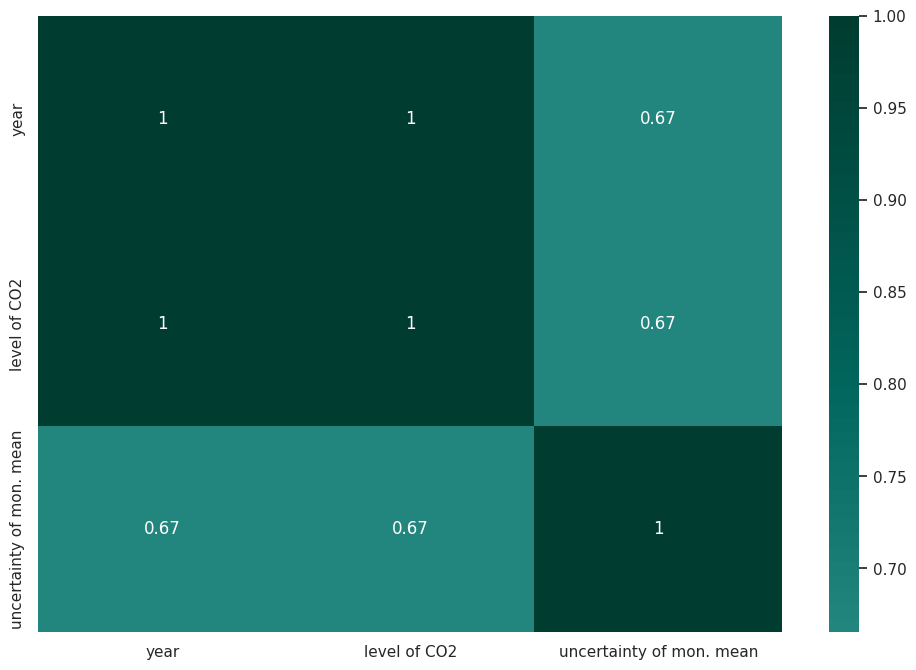

In [ ]:
#mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (12,8))
p=sns.heatmap(df.corr(), annot=True, cmap='BrBG', center=0)

#### Model Building

> Pada visualisasi grafik cluster pertama kita dapat mengidentifikasi dua kelompok data yang terbentuk. Secara khusus, kelompok 0 terpusat di sekitar bilangan non-positif, sementara kelompok 1 berfokus pada bilangan non-negatif.

> Juga didapatkan nilai terbesar terjadi pada k = 2, yaitu sebesar 0.5380267424312658. Sehingga dapat disimpulkan bahwa data tersebut dapat dibagi ke dalam 2 cluster.

> Berdasarkan visualisasi grafik cluster kedua, diperoleh dua buah cluster hasil analisis K-Means Machine learning dengan melihat nilai Silhouette score for k(clusters). Kemudian, dapat dilihat bahwa cluster 0 berada pada kelompok bilangan nol hinggan bilangan negatif. Sedangkan, cluster 1 berada pada kelompok bilangan nol hinggan bilangan positif.



In [ ]:
#melakukan scalling
scaler = StandardScaler()
scaler.fit(df[['level of CO2','uncertainty of mon. mean']])
scaled_ds = pd.DataFrame(scaler.fit_transform(df[['level of CO2','uncertainty of mon. mean']]), columns = (df[['level of CO2','uncertainty of mon. mean']]).columns)
print("All features are now scaled")

All features are now scaled


In [ ]:
print("Dataframe to be used for further modelling:")
scaled_ds

Dataframe to be used for further modelling:


,level of CO2,uncertainty of mon. mean
0,-1.570723,-1.068996
1,-1.458167,-0.510125
2,-1.358729,-1.101871
3,-1.295239,-1.266245
4,-1.129229,-0.970372
5,-1.033993,-0.411501
6,-0.968588,-1.890865
7,-0.878301,-0.937497
8,-0.758789,0.344618
9,-0.617009,-0.411501


In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(scaled_ds)
labels1 = kmeans1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
new_scaled_ds = pd.DataFrame(data = scaled_ds, columns = ['uncertainty of mon. mean', 'level of CO2'])
new_scaled_ds['label_kmeans1'] = labels1

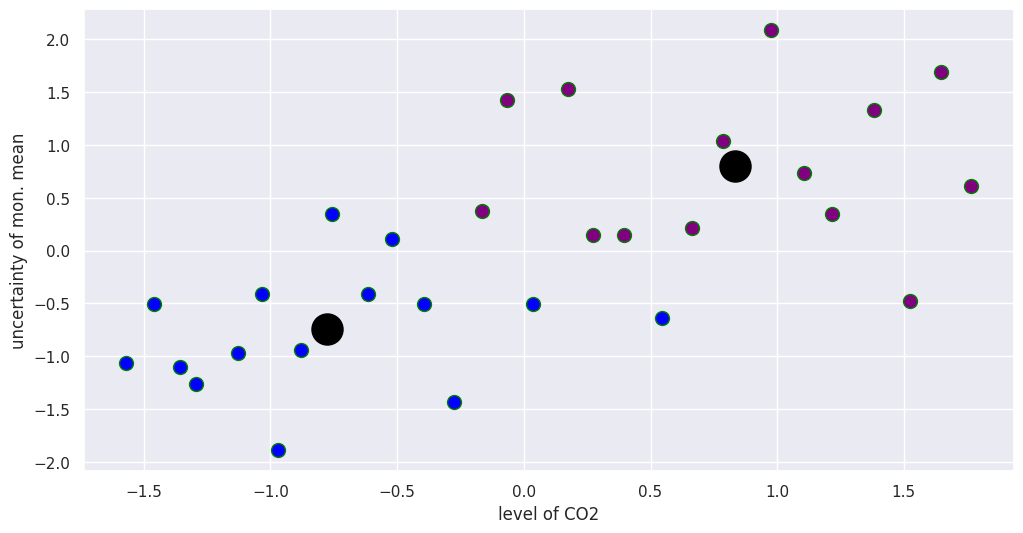

In [ ]:
# plot untuk melihat cluster setiap grup
fig, ax = plt.subplots(figsize = (12,6))
plt.scatter(new_scaled_ds['level of CO2'][labels1 == 0],
            new_scaled_ds['uncertainty of mon. mean'][labels1 == 0],
            c='blue',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_scaled_ds['level of CO2'][labels1 == 1],
            new_scaled_ds['uncertainty of mon. mean'][labels1 == 1],
            c='purple',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('level of CO2')
plt.ylabel('uncertainty of mon. mean')
plt.show()

In [ ]:
#metode silhouette merupakan metode yang lebih tepat untuk menentukan jumlah cluster
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_scaled_ds).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_scaled_ds,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Silhouette score for k(clusters) = 2 is 0.5380267424312658
Silhouette score for k(clusters) = 3 is 0.40015038820149806
Silhouette score for k(clusters) = 4 is 0.34008356460233896
Silhouette score for k(clusters) = 5 is 0.3668925223093319
Silhouette score for k(clusters) = 6 is 0.398431215756316
Silhouette score for k(clusters) = 7 is 0.3700098408855625
Silhouette score for k(clusters) = 8 is 0.404391760234684
Silhouette score for k(clusters) = 9 is 0.39315883007359637
Silhouette score for k(clusters) = 10 is 0.40346406119647094
Silhouette score for k(clusters) = 11 is 0.37589706857667055
Silhouette score for k(clusters) = 12 is 0.3552425370547889


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



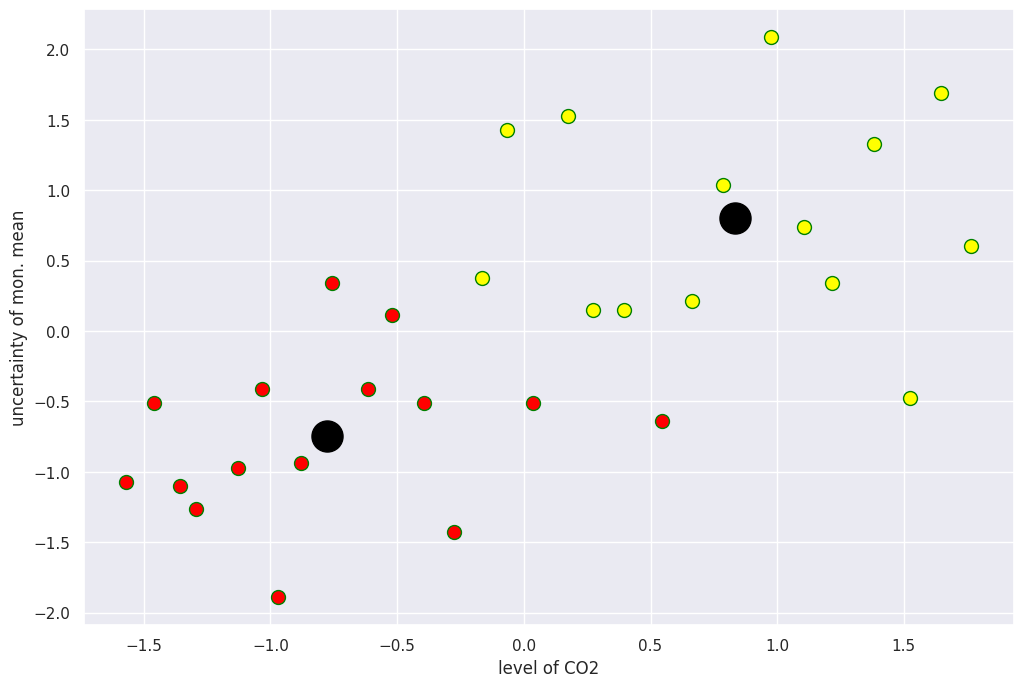

In [ ]:
#mencari clusternya berdasarkan nilai silhouette terbesar
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(scaled_ds)

labels2 = kmeans2.labels_
new_scaled_ds['label_kmeans2'] = labels2

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_scaled_ds['level of CO2'][new_scaled_ds.label_kmeans2 == 0],
            new_scaled_ds['uncertainty of mon. mean'][new_scaled_ds.label_kmeans2 == 0],
            c='red',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_scaled_ds['level of CO2'][new_scaled_ds.label_kmeans2 == 1],
            new_scaled_ds['uncertainty of mon. mean'][new_scaled_ds.label_kmeans2 == 1],
            c='yellow',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('level of CO2')
plt.ylabel('uncertainty of mon. mean')
plt.show()

#### Interpretasi Model Clustering

> Melalui syntax dibawah didapat sebuah dataframe menunjukkan ada 15 data level of CO2 dan uncertainty of mon. mean pada cluster 0 dan 14 data level of CO2 dan uncertainty of mon. mean pada cluster 1. Dan juga pengelompokan tiap tahun per cluster nya antara cluster 0 dan cluster 1



In [ ]:
# melihat label dari masing-masing tahun
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# create dataframe label
labels = pd.DataFrame(kmeans2.labels_)

In [ ]:
# replace nama kolom labels
label = labels.rename(columns = {0: "labels"})
label.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [ ]:
# add kolom kmeans2.labels_ pada dataframe data
df = pd.concat([df, label], axis = 1)
df

,year,level of CO2,uncertainty of mon. mean,labels
0,1994,358.959167,0.170000,0
1,1995,360.968333,0.184167,0
2,1996,362.743333,0.169167,0
3,1997,363.876667,0.165000,0
4,1998,366.840000,0.172500,0
5,1999,368.540000,0.186667,0
6,2000,369.707500,0.149167,0
7,2001,371.319167,0.173333,0
8,2002,373.452500,0.205833,0
9,2003,375.983333,0.186667,0


In [ ]:
# menampilkan jumlah anggota pada setiap cluster
sum_each_cluster = df['labels'].value_counts()
sum_each_cluster

0    15
1    14
Name: labels, dtype: int64

In [ ]:
# melihat anggota pada kelompok 0
df_0 = df.copy()
df_0['kluster'] = kmeans2.labels_
df_0[df_0['kluster']==0].sort_values(by=['level of CO2','uncertainty of mon. mean'])

,year,level of CO2,uncertainty of mon. mean,labels,kluster
0,1994,358.959167,0.170000,0,0
1,1995,360.968333,0.184167,0,0
2,1996,362.743333,0.169167,0,0
3,1997,363.876667,0.165000,0,0
4,1998,366.840000,0.172500,0,0
5,1999,368.540000,0.186667,0,0
6,2000,369.707500,0.149167,0,0
7,2001,371.319167,0.173333,0,0
8,2002,373.452500,0.205833,0,0
9,2003,375.983333,0.186667,0,0


In [ ]:
#melihat anggota pada kelompok 1
df_1 = df.copy()
df_1['kluster'] = kmeans2.labels_
df_1[df_1['kluster']==1].sort_values(by=['level of CO2','uncertainty of mon. mean'])

,year,level of CO2,uncertainty of mon. mean,labels,kluster
13,2007,384.025000,0.206667,1,1
14,2008,385.831667,0.233333,1,1
16,2010,390.101667,0.235833,1,1
17,2011,391.850833,0.200833,1,1
18,2012,394.055833,0.200833,1,1
20,2014,398.812500,0.202500,1,1
21,2015,401.011667,0.223333,1,1
22,2016,404.412500,0.250000,1,1
23,2017,406.758333,0.215833,1,1
24,2018,408.715000,0.205833,1,1
